In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import os
import zipfile
import json
from pprint import pprint
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Getting Dataset
local_zip = '/content/drive/MyDrive/Buddy Challenge/yt-dataset-kaggle.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
df_usa = pd.read_csv('/tmp/USvideos.csv')

In [ ]:
df_usa.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


We thought it would be interesting to see if there were any interesting relationships between disabled comments and other factors.

In [ ]:
#extracting the columns we're interested in
df_corr = df_usa[['views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'video_error_or_removed', 'category_id']]

#replace booleans with 0 or 1
cat_cleaning = {True:1, False:0}
df_corr['comments_disabled'] = df_corr['comments_disabled'].replace(cat_cleaning)
df_corr['video_error_or_removed'] = df_corr['video_error_or_removed'].replace(cat_cleaning)

#adding dislike & likes ratio
df_corr['dislikes_ratio'] = df_corr.apply(lambda x: x['dislikes']/x['views']*100, axis=1)
df_corr['likes_ratio'] = df_corr.apply(lambda x: x['likes']/x['views']*100, axis=1)

In [ ]:
df_corr.head()

,views,likes,dislikes,comment_count,comments_disabled,video_error_or_removed,category_id,dislikes_ratio,likes_ratio
0,748374,57527,2966,15954,0,0,22,0.396326,7.686932
1,2418783,97185,6146,12703,0,0,24,0.254095,4.017930
2,3191434,146033,5339,8181,0,0,23,0.167292,4.575780
3,343168,10172,666,2146,0,0,24,0.194074,2.964146
4,2095731,132235,1989,17518,0,0,24,0.094907,6.309732


A scatter matrix was used to visualize any interesting correlations between factors

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b8456da50>,
      dtype=object)

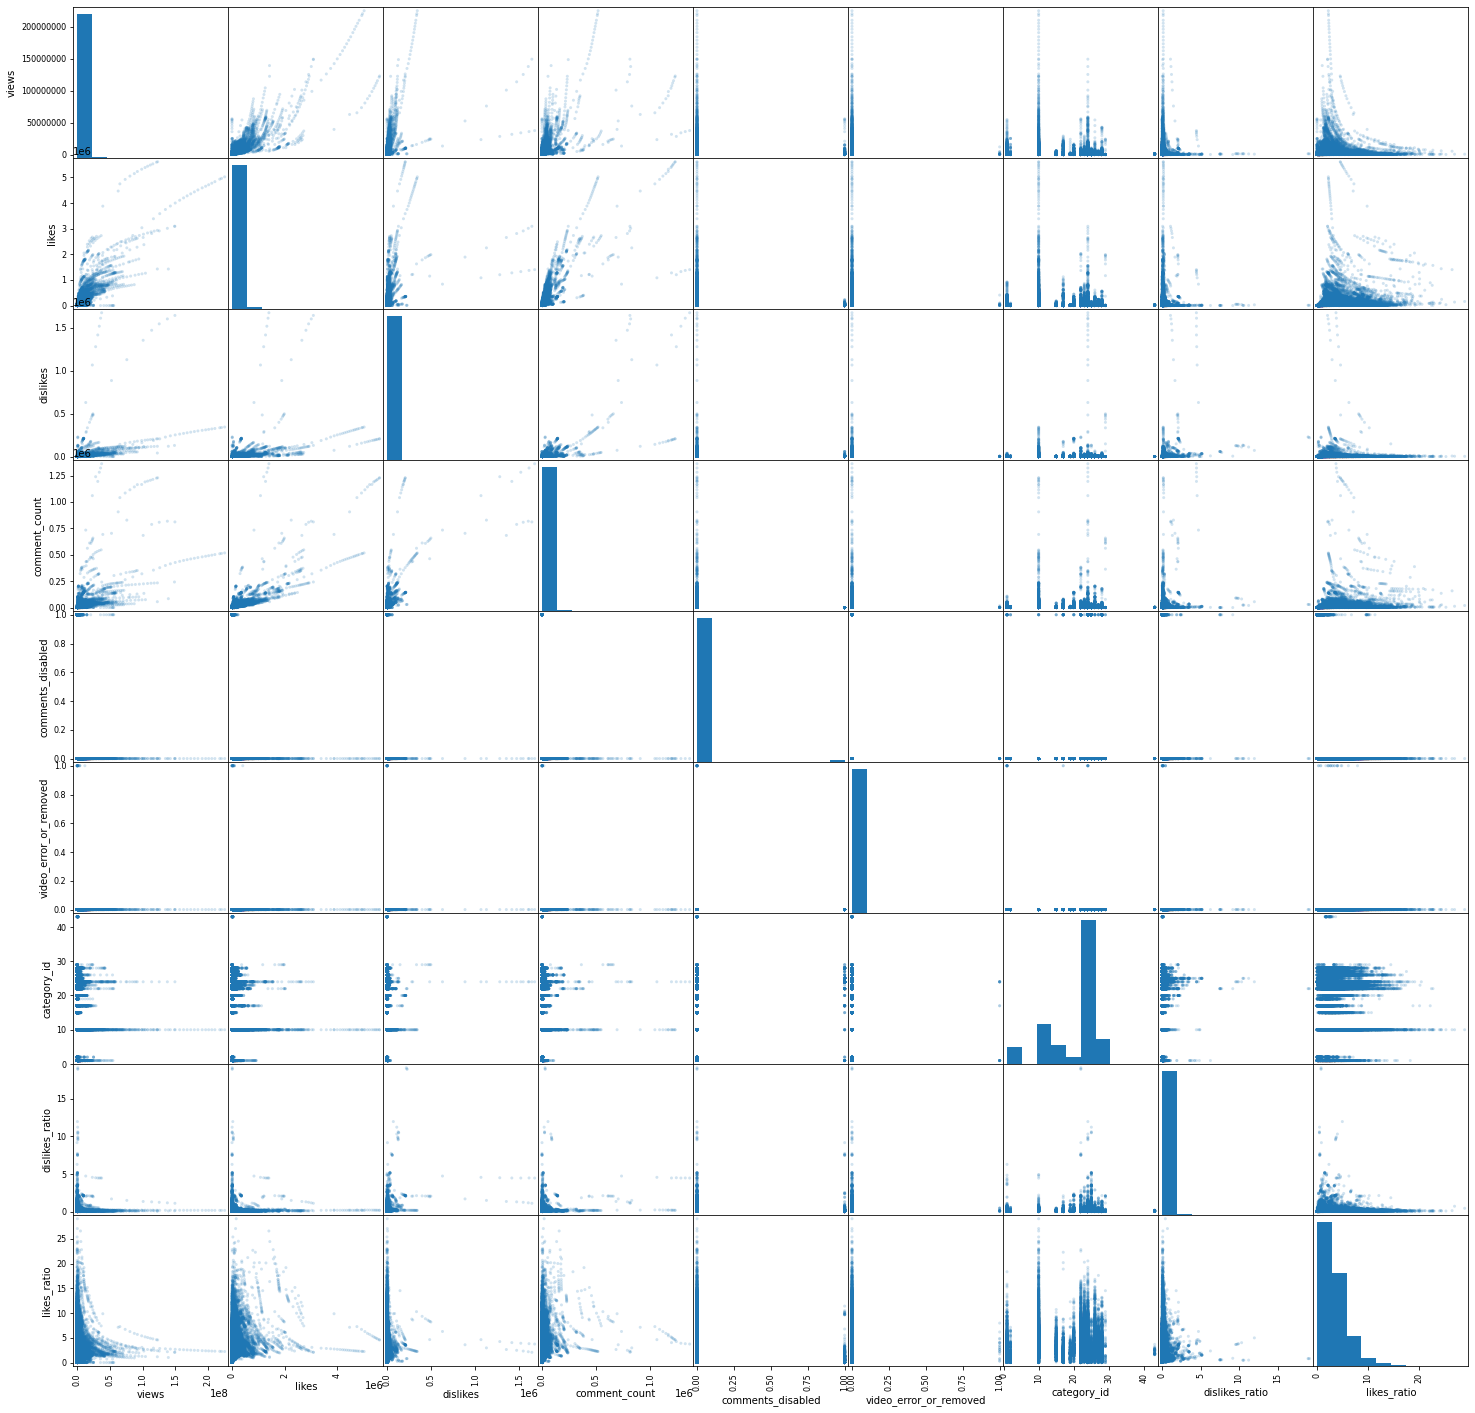

In [ ]:
pd.plotting.scatter_matrix(df_corr, alpha=0.2, figsize=(25,25))

Are there certain categories that comments are more disabled for? (e.g. more sensitive topics such as People & Blogs, News & Politics) How do likes & dislikes ratio vary for those categories?

In [ ]:
df_corr['category_id'].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43])

In [ ]:
a = df_corr['comments_disabled']
b = df_corr['category_id']
cross = pd.crosstab(a, [b], rownames=['a'], colnames=['b'])

In [ ]:
cross

b,1,2,10,15,17,19,20,22,23,24,25,26,27,28,29,43
a,,,,,,,,,,,,,,,,
0,2317,379,6463,916,2146,402,809,3144,3455,9768,2313,4135,1648,2311,53,57
1,28,5,9,4,28,0,8,66,2,196,174,11,8,90,4,0


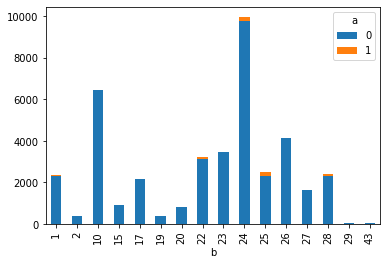

In [ ]:
cross.transpose().plot.bar(stacked=True)

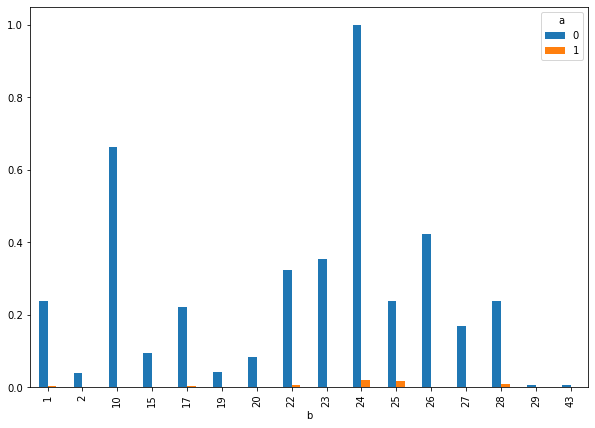

In [ ]:
# normalized column data to visualize data easier
#0 = There are comments
crosstab_us = cross.transpose()
crosstab_us = crosstab_us.apply(lambda x: x / 9768)
crosstab_us.plot.bar(figsize = (10,7))

In [ ]:
top_5 = crosstab_us[1].sort_values(ascending = False).head(5)
top_5_us = list(top_5.index)
print(top_5_us)

[24, 25, 28, 22, 17]


In the US, the categories that have the most disabled comments are Film & Animation, People & Blogs, Entertainment, News & Politics, and Science & Technology. We wanted to expand this question - What categories have the most disabled comments over all the countries?



In [ ]:
import csv

disabled_comments_categories = []
country_list = ['CA','DE','FR','GB','IN','US', 'IN', 'JP', 'KR', 'MX']
for country in country_list:
  file_name = country+'videos.csv'
  path =  '/tmp/'+file_name

  #encoding files to utf-8
  with open(path, 'r', encoding='utf-8', errors='ignore') as infile, open('/tmp/F_' + file_name, 'w') as outfile:
      inputs = csv.reader(infile)
      output = csv.writer(outfile)

      for index, row in enumerate(inputs):
          output.writerow(row)

  temp_df = pd.read_csv('/tmp/F_' + file_name)
  #print(country, temp_df)
  #temp_df = pd.read_csv('/tmp/'+file_name, error_bad_lines=False)
  temp_corr = temp_df[['comments_disabled', 'category_id']]
  temp_corr['comments_disabled'] = temp_corr['comments_disabled'].replace(cat_cleaning)
  a = temp_corr['comments_disabled']
  b = temp_corr['category_id']
  cross = pd.crosstab(a, [b], rownames=['a'], colnames=['b']).transpose()
  top_5 = list(cross[1].sort_values(ascending = False).head(5).index)
  disabled_comments_categories.append(top_5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
#count which categories have most disabled comments 
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for x in my_list:
      for item in x: 
          if (item in freq): 
              freq[item] += 1
          else: 
              freq[item] = 1

    return freq
    # for key, value in freq.items(): 
      # print ("% d : % d"%(key, value)) 

frequency_count=CountFrequency(disabled_comments_categories)
frequency_count

{1: 5, 10: 2, 17: 5, 20: 2, 22: 10, 23: 2, 24: 10, 25: 9, 27: 3, 28: 2}

In [ ]:
#map category id to category name
import json
with open('/tmp/US_category_id.json') as json_file:
  data = json.load(json_file)

# pprint(data)
# for x in data:
  # print (x)

category_mapping={}
for attribute in data['items']:
  category_mapping[int(attribute['id'])] = attribute['snippet']['title']

category_mapping

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [ ]:
for id in frequency_count.keys():
  print(category_mapping[id], " : ", frequency_count[id])


Entertainment  :  10
News & Politics  :  9
People & Blogs  :  10
Music  :  2
Science & Technology  :  2
Sports  :  5
Film & Animation  :  5
Education  :  3
Gaming  :  2
Comedy  :  2


The top categories with disabled categories varies by country. 

We can see that across almost all countries, videos in the Entertainment, People & Blogs, and News & Politics categories are more likely than other categories to have disabled comments. This is not surprising for News & Politics and People & Blogs, which is likely to have fairly polarizing or opinionated content. 




